In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# Librosa
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
general_path = '/Users/BluRay/Downloads/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
data, sr = librosa.load(f'{general_path}/genres_original/blues/blues.00001.wav')
print('data:', data, '\n')
print('data shape:', np.shape(data), '\n')
print('Sr=', sr)



data: [ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408] 

data shape: (661794,) 

Sr= 22050


In [4]:
#(silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(data)

In [5]:
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408] 

Audio File shape: (661794,)


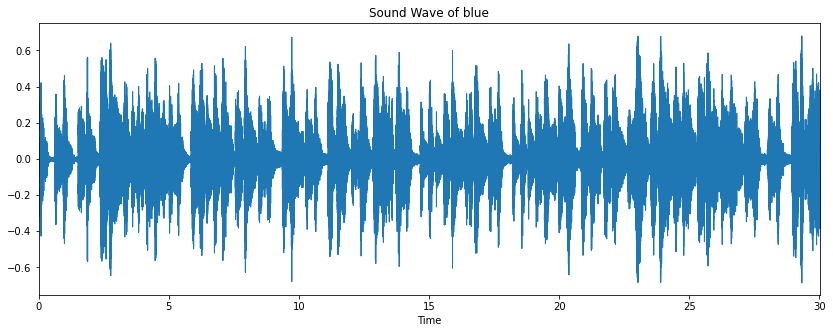

In [6]:
plt.figure(figsize = (14, 5))
librosa.display.waveplot(y = audio_file, sr = sr);
plt.title("Sound Wave of blue");

In [7]:
n_fft = 1024 # FFT window size
Hop_size = 512
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = Hop_size))
print('Shape:', np.shape(D))

Shape: (513, 1293)


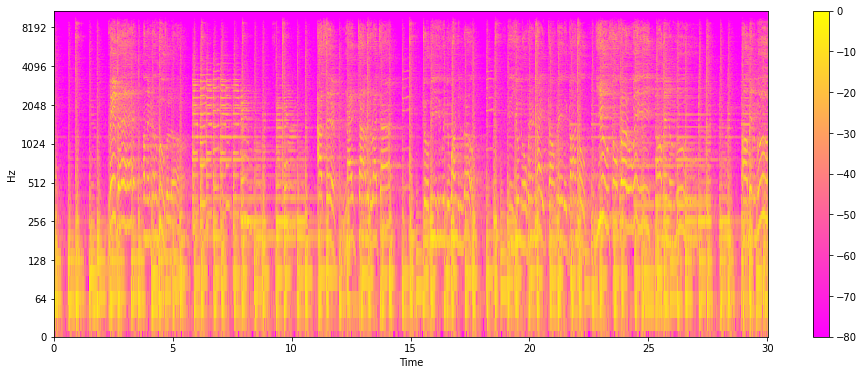

In [8]:
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = Hop_size, x_axis = 'time', y_axis = 'log',
                        cmap = 'spring')
plt.colorbar();

In [9]:
#Another_way
Y_scale = np.abs(D) ** 2
FRAME_SIZE = 2048
HOP_SIZE = 512
def plot_spectrogram(Y_scale, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(D, 
                             sr=sr, 
                             hop_length=HOP_SIZE, 
                             x_axis="time", 
                             y_axis=y_axis)
    
    plt.colorbar(format="%+2.f")

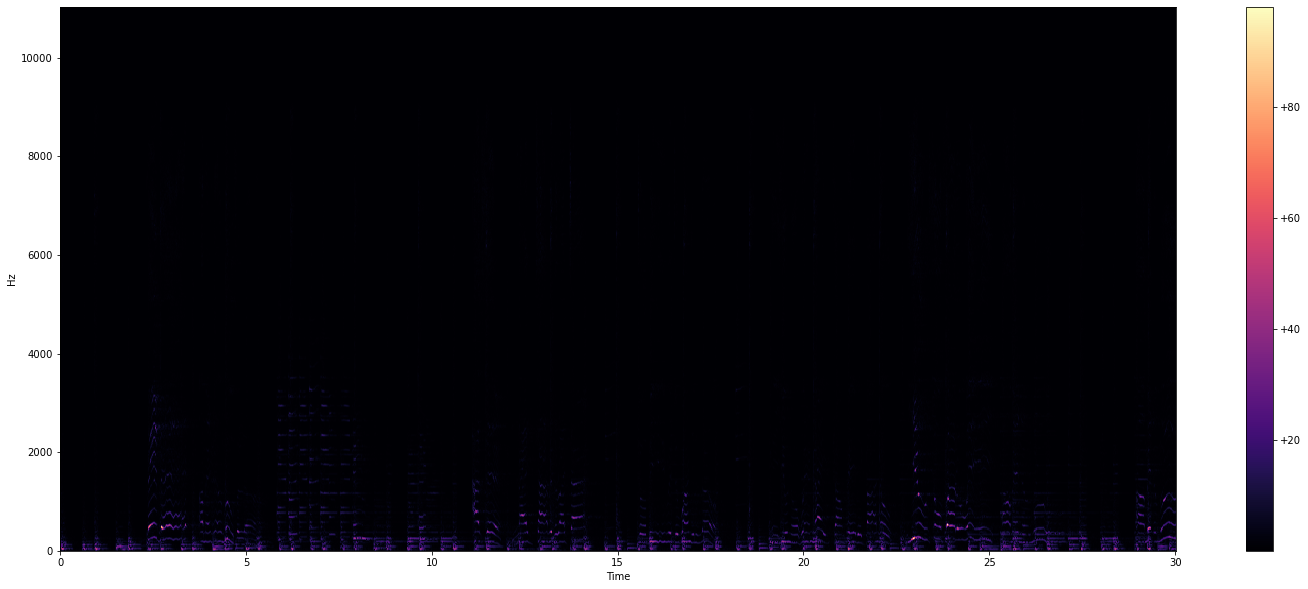

In [10]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

In [11]:
d2, sr2 = librosa.load(f'{general_path}/genres_original/disco/disco.00004.wav')

In [12]:
mel_spectrogram = librosa.feature.melspectrogram(d2, sr=sr2, n_fft=2048, hop_length=512, n_mels=10)

In [13]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

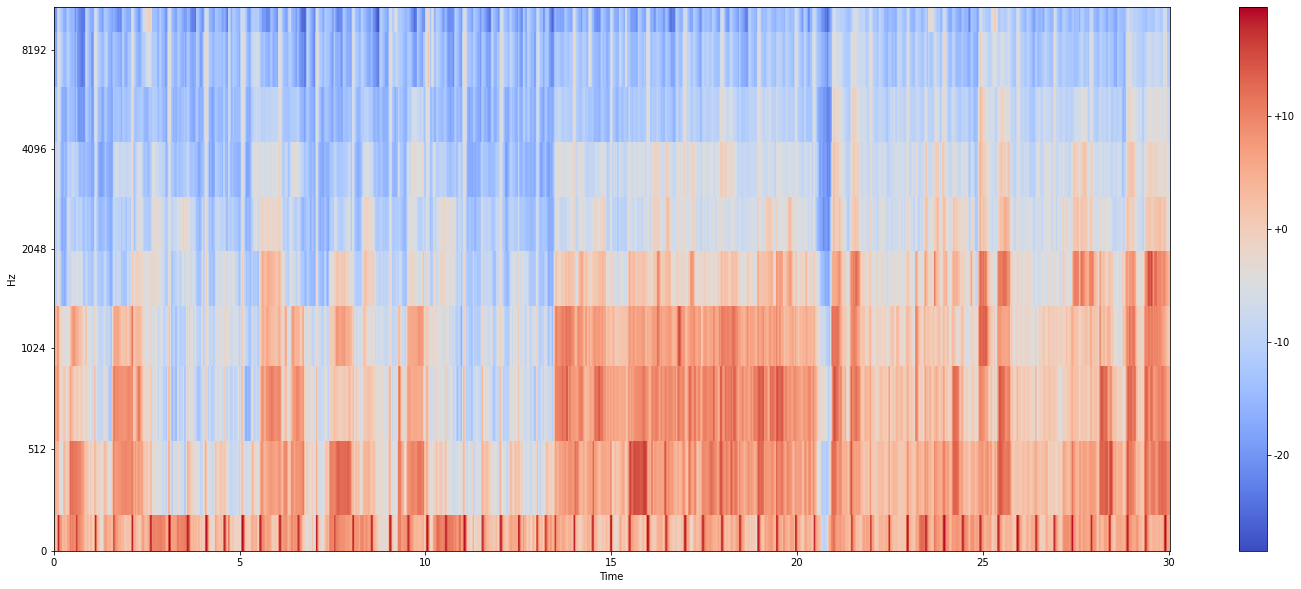

In [14]:

plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [15]:
y, sr3 = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
mel_spectrogram2 = librosa.feature.melspectrogram(y, sr=sr3, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram2 = librosa.power_to_db(mel_spectrogram2)

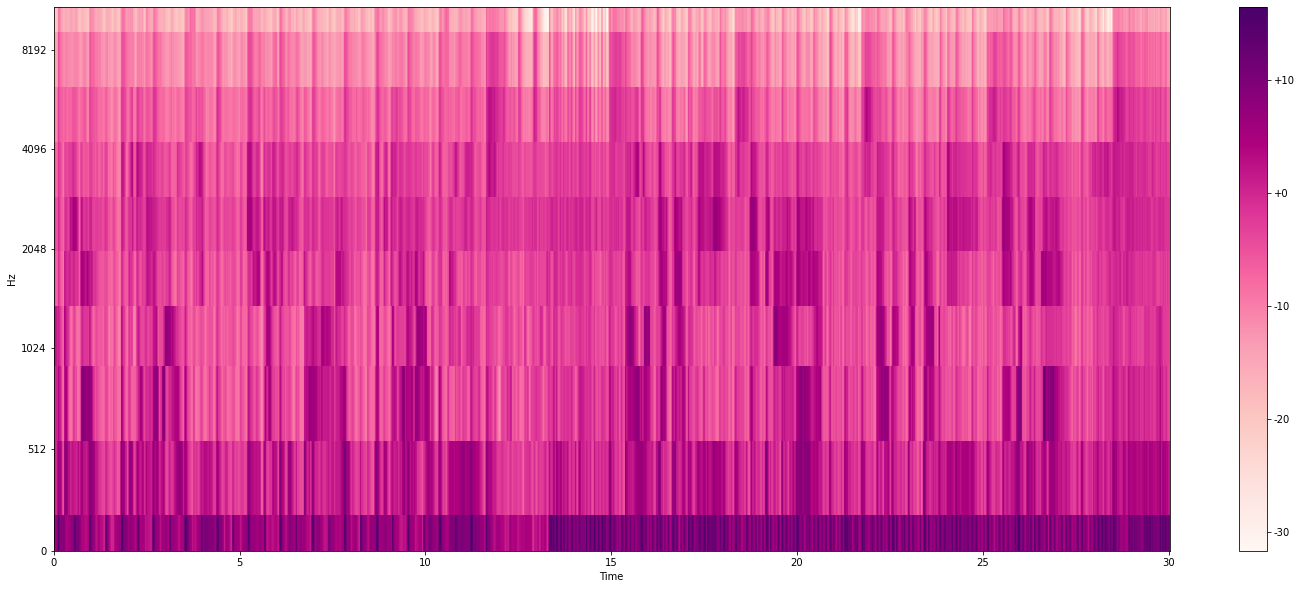

In [16]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram2, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr3,cmap = 'RdPu')
plt.colorbar(format="%+2.f")
plt.show()

In [17]:
#No. of zero crossings in the song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

37139


In [18]:
#Tempo BMP
tempo, _ = librosa.beat.beat_track(data, sr = sr)
print(tempo)

67.99958881578948


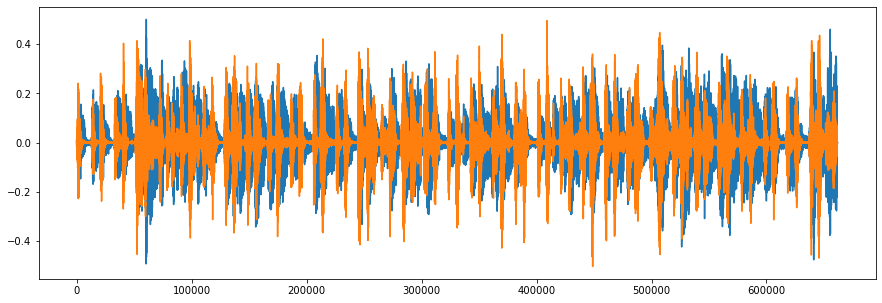

In [19]:
#Harmonics
#Perceptual understanding that represents the sound rhythm and emotion
plt.figure(figsize = (15, 5))
data_harm, data_p = librosa.effects.hpss(audio_file)
plt.plot(data_harm);
plt.plot(data_p);

Shape of the Spectral Centroids = (1293,) 

frames= range(0, 1293) 



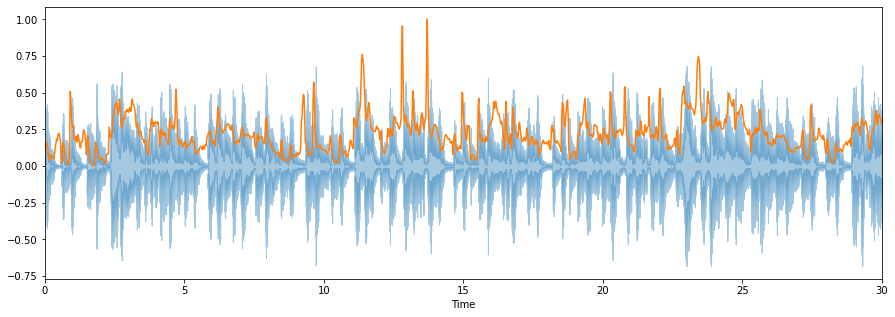

In [20]:
#Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]
print('Shape of the Spectral Centroids =', spectral_centroids.shape, '\n')
frames = range(len(spectral_centroids))
# frame to time
t = librosa.frames_to_time(frames)
print('frames=', frames, '\n')


# normalizing the Sound Data
def normalize(n, axis=0):
    return sklearn.preprocessing.minmax_scale(n, axis=axis)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (15, 5))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4);
plt.plot(t, normalize(spectral_centroids));

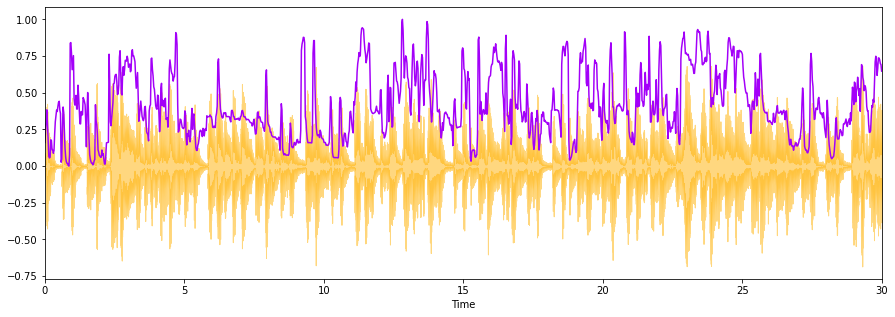

In [21]:
#Spectral Rolloff: is a measure of the shape of the signal. 
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]
plt.figure(figsize = (15, 5))
librosa.display.waveplot(audio_file, sr=sr,alpha=0.5,color='#FFB100');
plt.plot(t, normalize(spectral_rolloff),color = '#A300F9');

In [22]:
#The Mel frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=audio_file, n_mfcc=13, sr=sr)
mfccs.shape

(13, 1293)

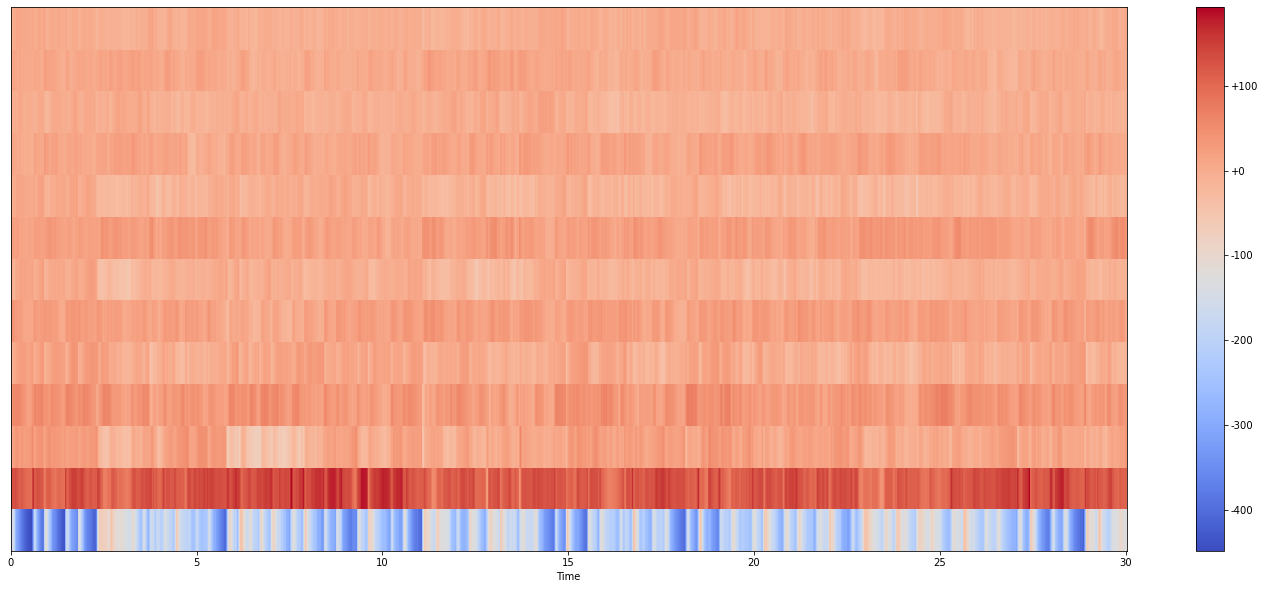

In [23]:
#Visualising MFCCs
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

Mean= 9.0777497e-10
Variance= 1.0000001


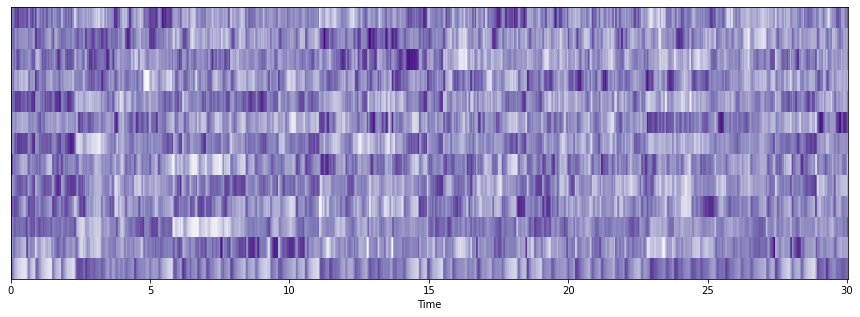

In [24]:
#Feature scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
#Calc. Mean and Variance
print('Mean=', mfccs.mean())
print('Variance=', mfccs.var())
plt.figure(figsize = (15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'Purples');

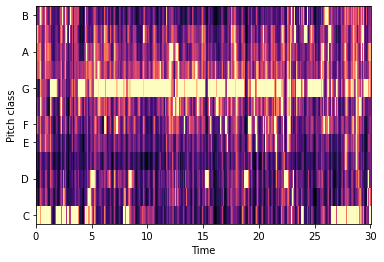

In [25]:
#Chroma
chroma = librosa.feature.chroma_cqt(audio_file, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)

In [26]:
#features_30_sec.csv. This file contains the mean and variance for each audio file fo the features analysed above.
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

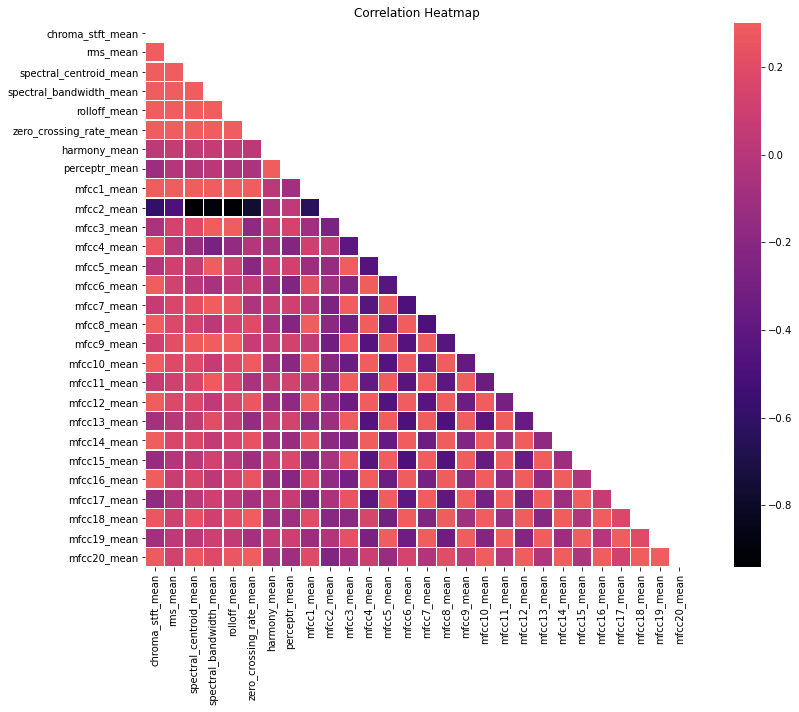

In [27]:
# Computing the Correlation Matrix
sp_cols = [col for col in data.columns if 'mean' in col]
corr = data[sp_cols].corr() 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# matplotlib figure
f, ax = plt.subplots(figsize=(16, 10));

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="magma", vmax=.3, center=0,
            square=True, linewidths=.5)

plt.title('Correlation Heatmap')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.xticks()
plt.yticks();

In [28]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [32]:
y = data['label'] 
X = data.loc[:, data.columns != 'label'] #select all columns without labels
cols = X.columns
minandmaxscaler = preprocessing.MinMaxScaler()
np_scaled = minandmaxscaler.fit_transform(X)
# new data frame 
X = pd.DataFrame(np_scaled, columns = cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [33]:
def model_performances(model, title = "Default"):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, '=', round(accuracy_score(y_test, predictions), 4))

In [34]:
#trying classification models
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_performances(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_performances(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_performances(nn, "Neural Nets")


# Naive Bayes
nb = GaussianNB()
model_performances(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_performances(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_performances(knn, "KNN")


Accuracy Support Vector Machine = 0.7487
Accuracy Logistic Regression = 0.6837
Accuracy Neural Nets = 0.6723
Accuracy Naive Bayes = 0.5048
Accuracy Stochastic Gradient Descent = 0.6723
Accuracy KNN = 0.8085


In [35]:
#Final Model with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets 
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
knn= KNeighborsClassifier(n_neighbors=19)
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)


preds = model.predict(X_test)

print('Accuracy', '=', round(accuracy_score(y_test, preds), 4), '\n')

Accuracy = 0.8085 



Accuracy : 0.8085 



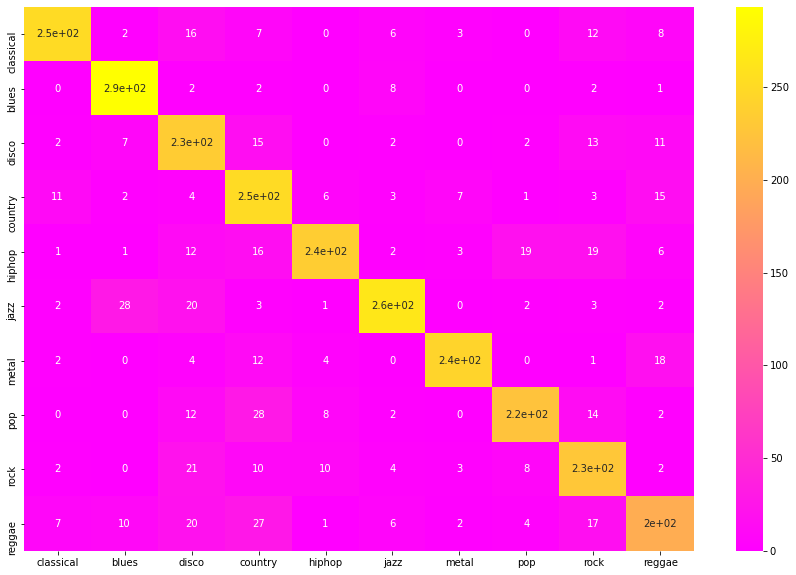

In [36]:
# Confusion Matrix
print('Accuracy', ':', round(accuracy_score(y_test, preds), 4), '\n')
confusion_matr = confusion_matrix(y_test, preds) 
plt.figure(figsize = (15, 10))
sns.heatmap(confusion_matr, cmap="spring", annot=True, 
            xticklabels = ["classical", "blues", "disco", "country", "hiphop", "jazz", "metal", "pop", "rock", "reggae"],
           yticklabels=["classical", "blues", "disco", "country", "hiphop", "jazz", "metal", "pop", "rock", "reggae"]);
plt.savefig("conf matrix")

In [37]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read data
data = pd.read_csv(f'{general_path}/features_30_sec.csv', index_col='filename')
labels = data[['label']]
data = data.drop(columns=['length','label'])
data.head()
datascaling=preprocessing.scale(data)
print('data type is', type(datascaling))

data type is <class 'numpy.ndarray'>


In [38]:
similarity = cosine_similarity(datascaling)
print("Similarity shape:", similarity.shape)
# Convert into a dataframe 
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index
sim_df_names.head()

Similarity shape: (1000, 1000)


filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         1.000000         0.049231         0.589618   
blues.00001.wav         0.049231         1.000000        -0.096834   
blues.00002.wav         0.589618        -0.096834         1.000000   
blues.00003.wav         0.284862         0.520903         0.210411   
blues.00004.wav         0.025561         0.080749         0.400266   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.284862         0.025561        -0.346688   
blues.00001.wav         0.520903         0.080749         0.307856   
blues.00002.wav         0.210411         0.400266        -0.082019   
blues.00003.wav         1.000000         0.126437         0.134796   
blues.00004.wav         0.126437         1.000000         0.556066   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav        -0.219483        -0.167626         0.641877   
blues.00001.wav         0.318286         0.415258         0.120649   
blues.00002.wav        -0.028061         0.104446         0.468113   
blues.00003.wav         0.300746         0.324566         0.352758   
blues.00004.wav         0.482195         0.623455         0.029703   

filename         blues.00009.wav  ...  rock.00090.wav  rock.00091.wav  \
filename                          ...                                   
blues.00000.wav        -0.097889  ...       -0.082829        0.546169   
blues.00001.wav         0.404168  ...       -0.098111       -0.325126   
blues.00002.wav        -0.132532  ...       -0.032408        0.561074   
blues.00003.wav         0.295184  ...       -0.320107       -0.206516   
blues.00004.wav         0.471657  ...        0.087605        0.017366   

filename         rock.00092.wav  rock.00093.wav  rock.00094.wav  \
filename                                                          
blues.00000.wav        0.578558        0.662590        0.571629   
blues.00001.wav       -0.370792       -0.191698       -0.330834   
blues.00002.wav        0.590779        0.583293        0.514537   
blues.00003.wav       -0.151132        0.041986       -0.172515   
blues.00004.wav        0.138035        0.104684       -0.034594   

filename         rock.00095.wav  rock.00096.wav  rock.00097.wav  \
filename                                                          
blues.00000.wav        0.610942        0.640835        0.496294   
blues.00001.wav       -0.077301       -0.222119       -0.302573   
blues.00002.wav        0.495707        0.566837        0.589983   
blues.00003.wav       -0.000287        0.020515       -0.107821   
blues.00004.wav        0.063454        0.063546        0.172944   

filename         rock.00098.wav  rock.00099.wav  
filename                                         
blues.00000.wav        0.284958        0.304098  
blues.00001.wav        0.499562        0.311723  
blues.00002.wav        0.216378        0.321069  
blues.00003.wav        0.502279        0.183210  
blues.00004.wav        0.153192        0.061785  

[5 rows x 1000 columns]

In [39]:
def matching_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)
    series = series.drop(name)
    
    # Display 4  matching songs 
    print("Matching songs as ", name)
    print(series.head(4))

In [40]:
#finding a matching song in the classical genre
matching_songs('classical.00002.wav') 

ipd.Audio(f'{general_path}/genres_original/classical/classical.00002.wav')

Matching songs as  classical.00002.wav
filename
jazz.00048.wav         0.766554
classical.00006.wav    0.766468
classical.00025.wav    0.746616
classical.00005.wav    0.716891
Name: classical.00002.wav, dtype: float64


In [41]:
#1st reccommendation is jazz but the rest is correct !
#Lets try again
#Generating the 2nd reccommendation
ipd.Audio(f'{general_path}/genres_original/classical/classical.00006.wav')




In [42]:
matching_songs('pop.00008.wav') 

ipd.Audio(f'{general_path}/genres_original/pop/pop.00008.wav')

Matching songs as  pop.00008.wav
filename
pop.00004.wav    0.811349
pop.00082.wav    0.759711
pop.00029.wav    0.755139
pop.00076.wav    0.750514
Name: pop.00008.wav, dtype: float64


In [43]:
#loading matching reccommended song
#1st reccommendation
ipd.Audio(f'{general_path}/genres_original/pop/pop.00004.wav')

#its a pop song! reccommended from the same genre of the generated song